# Chapter 6. Decision Analysis

In [1]:
from my_suite import Pmf
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

## 6.1 The *Price is Right* problem

Two contestants, Nate and Letia, play "The Showcase" on *The Price is Right*. Here, they are each shown a different select of prizes and told to guess the total cost without going over. Nate guesses over and Letia gues $78 under. Thus Nate gets nothing, and Letia wins her prizes, and by being with $250, also Nate's prizes.

Several questions for the Bayesian thinker:

1. Before seeing the prizes, what prior beliefs should the contestants have about the prices of the showcase?
2. After seeing the prizes, how should the contestants update those beliefs?
3. Based on the posterior distributions, what should the contestant bid?

Question 3 demonstrates a common use of Bayesian analysis: **decision analysis**.

## 6.2 The prior

The prior can be constructed by just taking the prices for previous showcases documented by fans.

## 6.3 Probability density functions

The **probability density function (PDF)** is a continuous version of a PMF where the possible values make up a continous range rather than a discrete set. Integrating a density over a given range calculates the probability of those values. However, we will instead use PDFs as part of a liklihood function.

## 6.4 Representing PDFs

We define the class `Pdf` as an abstract type.

In [2]:
class Pdf(object):
    
    def Density(self, x):
        raise UnimplementedMethodException()
    
    def MakePmf(self, xs):
        pmf = Pmf()
        for x in xs:
            pmf.Set(x, self.Density(x))
        pmf.Normalize
        return pmf

`Density()` takes a value, `x`, and returns the corresponding density; this will have to be implemented by a child class. `MakePmf()` makes a discrete approximation of the PDF.

The following `GuassianPdf` is a concrete type that provides a `Density()` function.

In [3]:
class GuassianPdf(Pdf):
    '''
    Create a Guassian PDF given a average (mu)
    and standard dev (sigma)
    '''
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    
    def Density(self, x):
        return scipy.stats.norm.pdf(x, self.mu, self.sigma)

The following `EstimatePdf` use kernel density estimation to create the PDF.

In [4]:
class EstimatePdf(Pdf):
    '''
    Create a PDF using kernel density estimate (KDE)
    '''
    def __init__(self, sample):
        self.kde = gaussian_kde(sample)
    
    def Density(self, x):
        return self.kde.evaluate(x)

Here is an example of using KDE to create the prior distribution for the showcase prices.

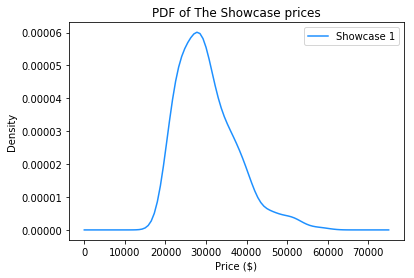

In [5]:
prices2011 = pd.read_csv("http://thinkbayes.com/showcases.2011.csv").set_index("Unnamed: 0").loc['Showcase 1', :].tolist()
prices2012 = pd.read_csv("http://thinkbayes.com/showcases.2012.csv").set_index("Unnamed: 0").loc['Showcase 1', :].tolist()
prices_showcase1 = [int(i) for i in prices2011 + prices2012]
pdf = EstimatePdf(prices_showcase1)
low, high = 0, 75000
n = 101
xs = np.linspace(low, high, n)
pmf = pdf.MakePmf(xs)
# plotting
plt.plot(xs, list(pmf.Values()), color = 'dodgerblue', label = 'Showcase 1')
plt.ylabel('Density')
plt.xlabel('Price ($)')
plt.title('PDF of The Showcase prices')
plt.legend()
plt.show()